In [1]:
# Imports
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import rand_score
import matplotlib.pyplot as plt
from math import ceil

In [2]:
# Getting the dataset
from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = X/255.

c:\Users\Serena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
def Gaussian_model(X, y):

    # 'data' will be a list of dictionaries containing info about the different executions
    data = []
    
    # Changing the number of adopted features
    for n_features in range(2, 201, 5):
        
        # Creation of a dictionary instance
        elem = {
            'PCA': n_features,
            'outcomes':[],
        }
        
        # Computing Pricipal Component Analysis
        pca = PCA(n_components = n_features)
        print("Computing PCA with ", n_features," components ...")
        X_pca = pca.fit_transform(X)
        
        # Changing the number of clusters
        for n_clusters in range(5, 16):
            
            # Creating the model
            print("Gaussian with ", n_clusters, " clusters ...")
            model = GaussianMixture(n_components = n_clusters, covariance_type = "diag", random_state = 42, max_iter = 300)
            
            # Fit phase
            print("Fitting ...")
            model.fit(X_pca)
            
            # Predict phase
            print("Predicting ...")
            predictions = model.predict(X_pca)
            
            rand_index = rand_score(y, predictions)
            
            # Filling the dictionary instance
            elem['outcomes'].append({
                'n_clusters': n_clusters,
                'rand_index': rand_index,
            })
    
        data.append(elem)
    
    return data

In [4]:
data = Gaussian_model(X, y.to_numpy().ravel())

Computing PCA with  2  components ...
Gaussian with  5  clusters ...
Fitting ...
Predicting ...
Gaussian with  6  clusters ...
Fitting ...
Predicting ...
Gaussian with  7  clusters ...
Fitting ...
Predicting ...
Gaussian with  8  clusters ...
Fitting ...
Predicting ...
Gaussian with  9  clusters ...
Fitting ...
Predicting ...
Gaussian with  10  clusters ...
Fitting ...
Predicting ...
Gaussian with  11  clusters ...
Fitting ...
Predicting ...
Gaussian with  12  clusters ...
Fitting ...
Predicting ...
Gaussian with  13  clusters ...
Fitting ...
Predicting ...
Gaussian with  14  clusters ...
Fitting ...
Predicting ...
Gaussian with  15  clusters ...
Fitting ...
Predicting ...
Computing PCA with  7  components ...
Gaussian with  5  clusters ...
Fitting ...
Predicting ...
Gaussian with  6  clusters ...
Fitting ...
Predicting ...
Gaussian with  7  clusters ...
Fitting ...
Predicting ...
Gaussian with  8  clusters ...
Fitting ...
Predicting ...
Gaussian with  9  clusters ...
Fitting ...
Predi

In [5]:
# Retrieving the best and the worst configurations for each PCA dimension based on the rand index
best_data = []
worst_data = []
for i in range(len(data)):
    best = max(data[i]['outcomes'], key = lambda x: x['rand_index'])
    worst = min(data[i]['outcomes'], key = lambda x: x['rand_index'])
    best_data.append({
        'PCA': data[i]['PCA'],
        'n_clusters': best['n_clusters'],
        'rand_index': best['rand_index'],
    })
    worst_data.append({
        'PCA': data[i]['PCA'],
        'n_clusters': worst['n_clusters'],
        'rand_index': worst['rand_index'],
    })

In [6]:
# Retrieving the best and the worst configuration based on the rand index among all configurations
best_df = pd.DataFrame(best_data)
best_model = best_df.iloc[best_df['rand_index'].idxmax()]
best_model

PCA           12.000000
n_clusters    15.000000
rand_index     0.897154
Name: 2, dtype: float64

In [7]:
# Retrieving the best and the worst configuration based on the rand index among all configurations
worst_df = pd.DataFrame(worst_data)
worst_model = worst_df.iloc[worst_df['rand_index'].idxmin()]
worst_model

PCA           17.00000
n_clusters     5.00000
rand_index     0.66814
Name: 3, dtype: float64

Computing PCA with  12.0  components ...
Computing PCA with  17.0  components ...


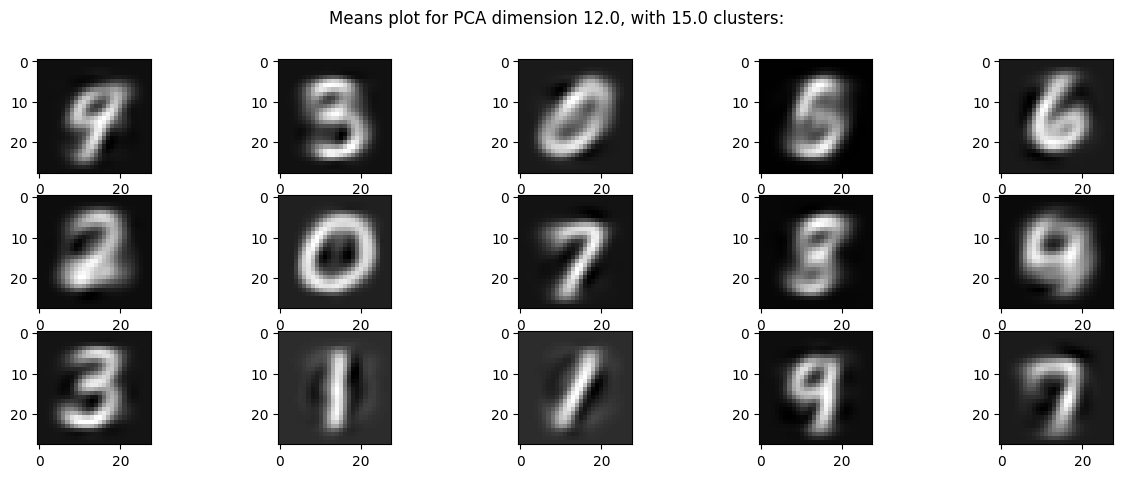

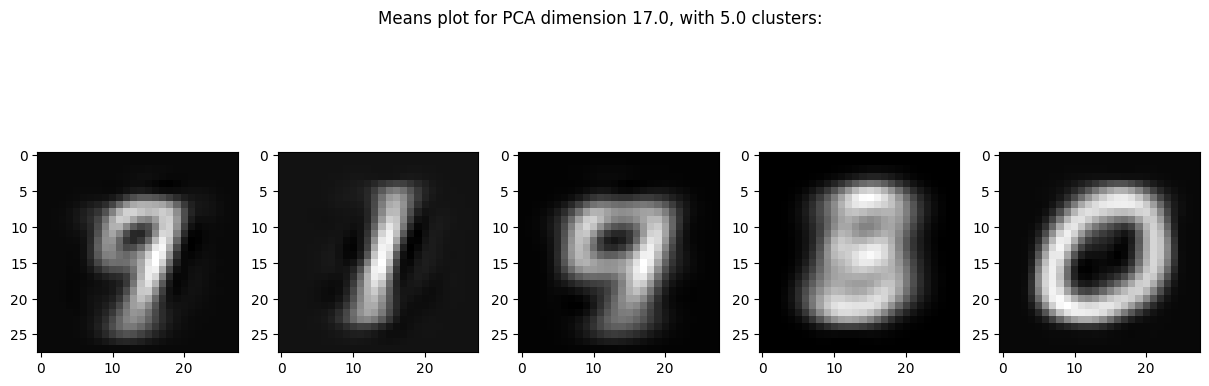

In [8]:
# get best and worst PCA models
for model in [best_model, worst_model]:
    
    # Computing Pricipal Component Analysis
    pca = PCA(n_components = int(model['PCA']))
    print("Computing PCA with ", model['PCA']," components ...")
    X_pca = pca.fit_transform(X)
    
    model_gm = GaussianMixture(n_components = int(model['n_clusters']), covariance_type = "diag", random_state = 42, max_iter = 300)
    model_gm.fit(X_pca)
    image_shape = (28, 28)

    fig, ax = plt.subplots(ceil(model['n_clusters']/5), 5, figsize=(15, 5))
    fig.suptitle(f"Means plot for PCA dimension {model['PCA']}, with {model['n_clusters']} clusters:")
    axs = ax.flatten()
    
    for i in range(int(model['n_clusters'])):
        axs[i].imshow(pca.inverse_transform(model_gm.means_[i]).reshape(image_shape), cmap='gray')